In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_eb834612c2f640c2ab16310dede39eee = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='gPRub1uFVjk3uPmck4_PfY1BoLiT5X50cXvPdn5HEusb',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_eb834612c2f640c2ab16310dede39eee.get_object(Bucket='mllearn-donotdelete-pr-j4fykmb18hcdi9',Key='Bank_Customer_retirement.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

bank_df = pd.read_csv(body)



In [14]:
bank_df.head()

,Customer ID,Age,401K Savings,Retire
0,0,39.180417,322349.8740,0
1,1,56.101686,768671.5740,1
2,2,57.023043,821505.4718,1
3,3,43.711358,494187.4850,0
4,4,54.728823,691435.7723,1


In [15]:
bank_df.shape

(500, 4)

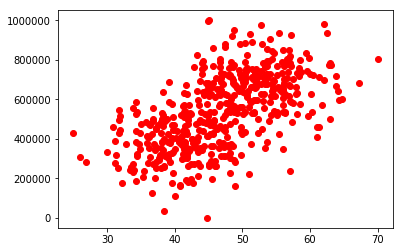

In [16]:
plt.scatter(bank_df['Age'],bank_df['401K Savings'],color='red')

In [17]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
Customer ID     500 non-null int64
Age             500 non-null float64
401K Savings    500 non-null float64
Retire          500 non-null int64
dtypes: float64(2), int64(2)
memory usage: 15.7 KB


In [18]:
bank_df.describe()

,Customer ID,Age,401K Savings,Retire
count,500.000000,500.000000,500.000000,500.000000
mean,249.500000,46.757077,534984.465804,0.500000
std,144.481833,7.790125,187675.818881,0.500501
min,0.000000,25.000000,10.000000,0.000000
25%,124.750000,41.299451,382626.524425,0.000000
50%,249.500000,46.695770,534512.984350,0.500000
75%,374.250000,52.322551,680670.257025,1.000000
max,499.000000,70.000000,1000000.000000,1.000000


In [19]:
bank_df.isnull().any()

Customer ID     False
Age             False
401K Savings    False
Retire          False
dtype: bool

In [20]:
bank_df.keys()

Index(['Customer ID', 'Age', '401K Savings', 'Retire'], dtype='object')

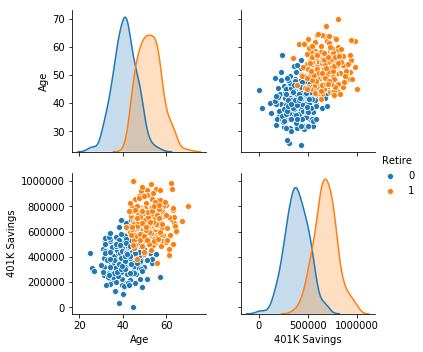

In [21]:
sns.pairplot(bank_df,hue='Retire',vars =['Age','401K Savings'])

In [22]:
bank_df = bank_df.drop(['Customer ID'],axis=1)

In [23]:
bank_df.head()

,Age,401K Savings,Retire
0,39.180417,322349.8740,0
1,56.101686,768671.5740,1
2,57.023043,821505.4718,1
3,43.711358,494187.4850,0
4,54.728823,691435.7723,1


In [24]:
X = bank_df.drop(['Retire'],axis=1)
y = bank_df['Retire']

In [26]:
X.shape,y.shape

((500, 2), (500,))

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

In [28]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((400, 2), (100, 2), (400,), (100,))

In [29]:
from sklearn.svm import SVC
model = SVC(C=10,gamma=0.001,kernel='linear')
model.fit(X_train,y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [30]:
y_pred= model.predict(X_test)

In [31]:
X_test['Prediction'] = y_pred

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [32]:
X_test

,Age,401K Savings,Prediction
90,52.741952,629188.3090,1
254,34.824510,427485.8228,0
283,42.384107,524356.9458,1
445,39.281850,388331.7357,0
461,53.371780,761245.6331,1
15,56.331436,531736.7418,1
316,48.161442,536782.4105,1
489,47.870509,368474.8924,0
159,57.246160,769459.1501,1
153,47.907133,724481.8171,1


In [33]:
model.predict([[39.180417,322349.8740]])

array([0])

In [34]:
model.score(X_test.drop('Prediction',axis=1),y_pred)

1.0

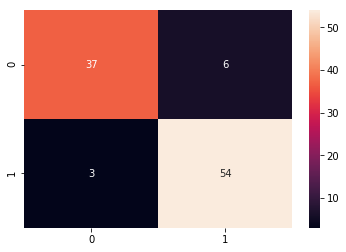

In [35]:
from sklearn.metrics import classification_report,confusion_matrix
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89        43
           1       0.90      0.95      0.92        57

   micro avg       0.91      0.91      0.91       100
   macro avg       0.91      0.90      0.91       100
weighted avg       0.91      0.91      0.91       100



In [37]:
param_grid = {'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001]}

In [38]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=0,verbose=4)
grid.fit(X_train,y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......... C=0.1, gamma=1, score=0.5149253731343284, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] .......... C=0.1, gamma=1, score=0.518796992481203, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] .......... C=0.1, gamma=1, score=0.518796992481203, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.5149253731343284, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ........ C=0.1, gamma=0.1, score=0.518796992481203, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ........ C=0.1, gamma=0.1, score=0.518796992481203, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...... C=0.

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.5s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]},
       pre_dispatch='2*n_jobs', refit=0, return_train_score='warn',
       scoring=None, verbose=4)

In [39]:
grid.best_params_

{'C': 10, 'gamma': 0.001}